# Part II - (Données du système Ford GoBike )
## by Clarisse TOMAVO

## Investigation Overview

> General objective of the presentation.
In this project 3 of the data analysis program, we will use our skills in explanatory and exploratory visualization, while going through data wrangling to make the data clean as necessary.
The end goal is to be able to discover and answer interesting questions about the dataset.



## Dataset Overview

> Our analysis will focus on the Ford GoBike system dataset. It has 16 columns ahead. During our analysis, columns might be added or removed. Here are the 16 columns that come with the dataset.  
* 'duration_sec': (in seconds),  
* 'start_time' (In seconds),  
* 'end_time' (In seconds), 
* 'start_station_id', 
* 'start_station_name', 
* 'start_station_latitude', 
* 'start_station_longitude', 
* 'end_station_id', 
* 'end_station_name', 
* 'end_station_latitude', 
* 'end_station_longitude', 
* 'bike_id', 
* 'user_type' (Which has two values: customer, subscriber), 
* 'member_birth_year', 
* 'member_gender' (Which has three values: Male, Female, Other), 
* 'bike_share_for_all_trip' (Which has two values: Yes or No) 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Our dataset has undergone cleaning. We are coming to 18 columns (2 columns were created by us)
# Let's import our dataset

df_clean=pd.read_csv('df_clean_csv.csv')

## Un apercu des cinq premieres lignes de notre jeu de données.

In [3]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day
0,52185,2019-02-28,2019-03-01,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February,Thursday
1,42521,2019-02-28,2019-03-01,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February,Thursday
2,61854,2019-02-28,2019-03-01,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February,Thursday
3,36490,2019-02-28,2019-03-01,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February,Thursday
4,1585,2019-02-28,2019-03-01,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February,Thursday


## (Visualization 1) The number of trips made by each group of customers
### Here we will find out, the types of users of the Ford GoBike system. And also discover the number of times each type of user has used the system.

In [4]:
print("Les différents types d'utilisateur avec le nombre de fois qu'ils ont utilisé le système.\n")
print(df_clean['user_type'].value_counts(),"\n")

Les différents types d'utilisateur avec le nombre de fois qu'ils ont utilisé le système.

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64 



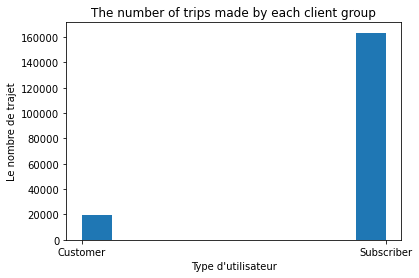

In [5]:
plt.hist(df_clean['user_type'])
plt.xlabel("Type d'utilisateur")
plt.ylabel("Le nombre de trajet")
plt.title("The number of trips made by each client group");

## (Visualization 2) Number of uses per day

### Let's find out the days when the systems are used the most.

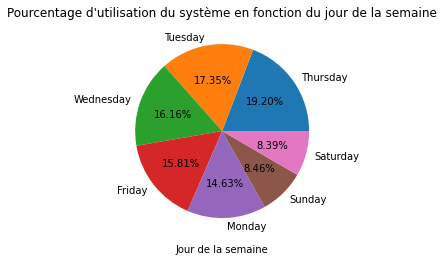

In [6]:
number_of_day = df_clean['start_day'].value_counts()
plt.pie(number_of_day, labels = number_of_day.index,counterclock = True, autopct='%1.2f%%')
plt.xlabel('Jour de la semaine')
plt.title("Pourcentage d'utilisation du système en fonction du jour de la semaine");

## (Visualization 3) Stations that are much more starting points for trips.

## If you want to place billboards, you can decide to place them perhaps at the stations which are often the starting point for the journeys or the stations which are often the point of arrival for the journeys.

## Let the data speak to find out.

In [7]:
def allInfosTopStation(col1,col2):
    #Recupération des top 10
    top_10 = df_clean[col1].value_counts()[:10]
    #Conversion en dataframe
    df_top_10=pd.DataFrame(top_10)
    #Rénitialisation de l'index avec reset_index puisque le dataframe conçu prend les id de station comme son index
    #Alors que nous la voulons comme une colonne.
    df_top_10=df_top_10.reset_index()
    #Renommage des colonnes du dataframe
    df_top_10=df_top_10.rename(columns={'index':'id',col1:'count_trip'})
    liste=[]
    #Recupération du nom,de la longitude et de la latitude de tous ces top 10 start_id
    for i in range(0,len(df_top_10['id']),1):
        id_current=df_top_10['id'].iloc[i] 
        name=df_clean.query('start_station_id == @id_current')[[col2+'_station_name',col2+'_station_longitude',col2+'_station_latitude']][:1] 
        name_id=name[col2+'_station_name'].iloc[0]
        latitude_id= name[col2+'_station_latitude'].iloc[0]
        longitude_id= name[col2+'_station_longitude'].iloc[0]
        liste.append({'id': id_current, 'name':name_id,'lat':latitude_id,'long':longitude_id,'count_trip':df_top_10['count_trip'].iloc[i]})
    return pd.DataFrame (liste)


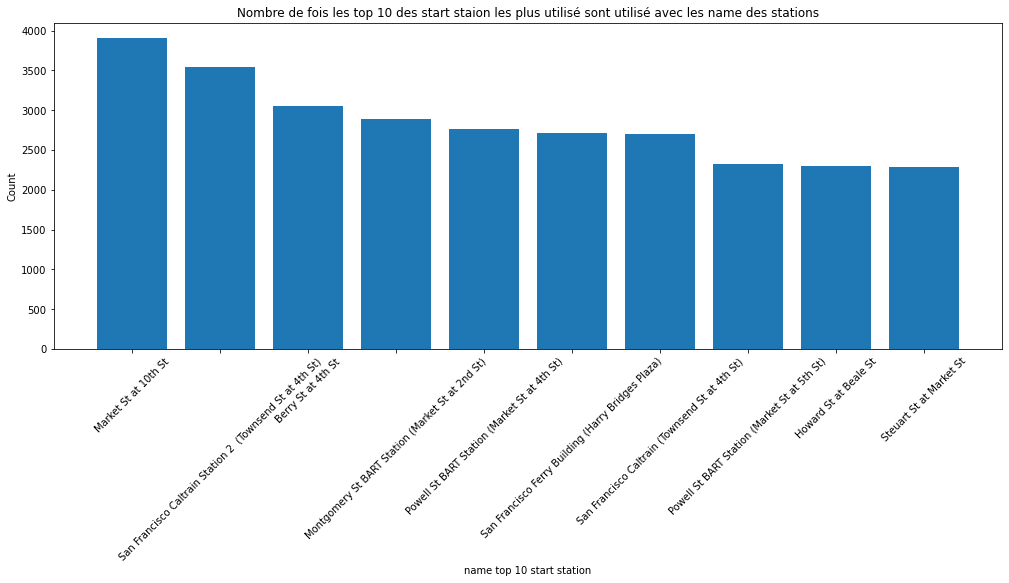

In [8]:
data_info=allInfosTopStation('start_station_id','start')
plt.figure(figsize=(17,6))
plt.bar(data_info['name'],data_info['count_trip'])
plt.xlabel("name top 10 start station")
plt.ylabel("Count")
plt.title("Nombre de fois les top 10 des start staion les plus utilisé sont utilisé avec les name des stations")
plt.xticks(rotation=45);

## (Visualisation4) Let's study the proximity of the top 10 departure stations

## This may let you know that most of their client resides in such place. And maybe they have things in common.

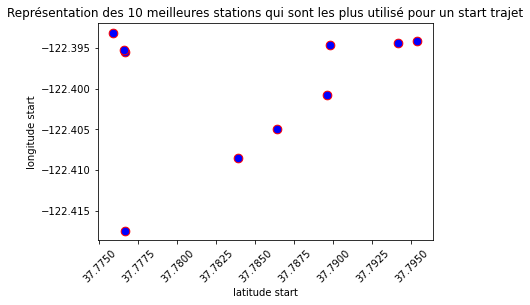

In [9]:
plt.scatter(x=data_info['lat'],y=data_info['long'], c='b', s=75, edgecolor='r')
plt.title('Représentation des 10 meilleures stations qui sont les plus utilisé pour un start trajet')
plt.xlabel('latitude start')
plt.ylabel('longitude start')
plt.xticks(rotation=45);

## (Visualisation5) Quel catégorie d'utilisateur dure plus pour un trajet?


In [10]:
base_color=sb.color_palette()[1]
df_duration_by_user = df_clean[['user_type', 'duration_sec']].groupby('user_type').mean()
print("Durée moyenne du temps passé pour les trajets par les deux types d'utilisateur du système.\n")
print(df_duration_by_user)

Durée moyenne du temps passé pour les trajets par les deux types d'utilisateur du système.

            duration_sec
user_type               
Customer     1433.475734
Subscriber    640.164766


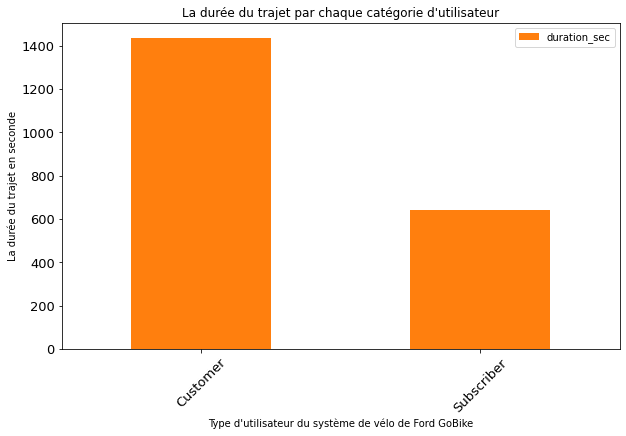

In [11]:
df_duration_by_user.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13)
plt.xticks(rotation=45)
plt.title("La durée du trajet par chaque catégorie d'utilisateur")
plt.ylabel('La durée du trajet en seconde')
plt.xlabel("Type d'utilisateur du système de vélo de Ford GoBike");

## (Visualization6) Bike system usage time report by user type per day
## This, to be able to know which promotion is done by targeting customer categories.

''

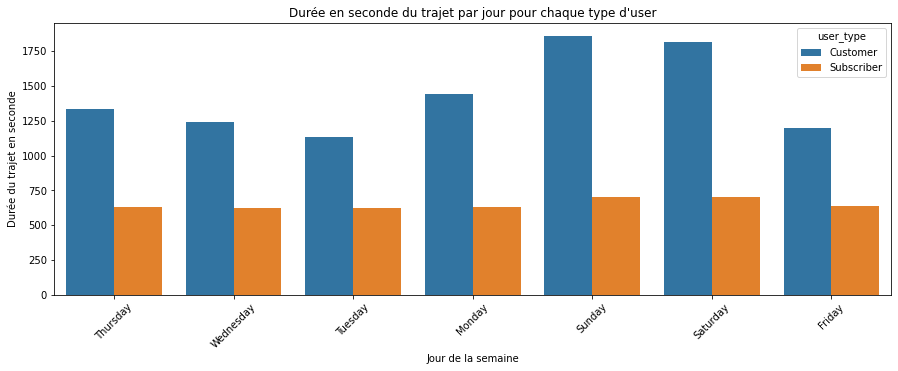

In [12]:
plt.figure(figsize=(15,5))
sb.barplot(data=df_clean, x='start_day', y='duration_sec', ci=None, hue='user_type')
plt.xticks(rotation=45)
plt.xlabel('Jour de la semaine')
plt.ylabel('Durée du trajet en seconde')
plt.title("Durée en seconde du trajet par jour pour chaque type d'user")
;

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [13]:
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 772093 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil

### <p style='color:red'>Merci pour l'attention!</p>
### <p style='color:black; text-align:right'>11/11/2022</p>